# **Sentiment Analysis**
- Text = Topic + Opinion
- Topic Modeling
- Opinion Mining
  1. 감정 어휘 사전(afinn)을 통한 감정 상태 분류
  2. Deep Learning (LSTM model) 을 이용한 감정 상태 분류

## **1. Afinn 감정어휘사전 사용**

In [1]:
!pip install afinn

     |████████████████████████████████| 52 kB 1.0 MB/s 
  Created wheel for afinn: filename=afinn-0.1-py3-none-any.whl size=53448 sha256=ede9ad72e4ef2b11abc0c02974eaa1b46953f051d666701f3ee5c270cb342271
  Stored in directory: /root/.cache/pip/wheels/9d/16/3a/9f0953027434eab5dadf3f33ab3298fa95afa8292fcf7aba75
Successfully built afinn


### **Dataset 준비**

In [2]:
from sklearn.datasets import fetch_20newsgroups

news_data = fetch_20newsgroups(subset="train")

In [3]:
news_data.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

### **감정 상태 분류 및 시각화**
- afinn : 감정 단어 사전
- afinn.score(data)

In [4]:
from afinn import Afinn

afin = Afinn()
for i in range(5):
    print(news_data.data[i])
    print(afin.score(news_data.data[i]))
    print("*******")

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----





7.0
*******
From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-white')

positive = 0
negative = 0
neutral = 0

for i in news_data.data:
    score = afin.score(i)
    if score > 0 : 
        positive += 1
    elif score == 0:
        neutral += 1
    else:
        negative += 1

plt.bar(np.arange(3), [positive, neutral, negative])
plt.xticks(np.arange(3), ['Positive', 'Neutral', 'Negative'])
plt.show()      

print("Positive News : {0}\nNeutral News : {1}\nNegative News : {2}".format(positive, neutral, negative))

## **2. Deep Learning (LSTM model) 을 통한 감정 분석**

### **한국어 자연어 처리 konlpy 와 형태소 분석기 MeCab 설치**

https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

<img src="https://user-images.githubusercontent.com/92680829/141183892-fe175959-a844-4488-8d61-02d9e670c1e4.png" width="400px" />

- Twitter 보다 Mecab 의 효율이 가장 좋지만, Mac-OS 가 아닌 Windows 환경에서는 별도 Mecab-python 설치가 필요함

In [ ]:
!pip install konlpy

In [ ]:
!set -x \
$$ pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

In [8]:
import re
import urllib.request
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=RuntimeWarning)
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-dark")

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### **Naver 영화리뷰 데이터 Load**
- 모델 감정라벨링 학습용
- 총 200,000개 리뷰로 구성된 데이터
- 영화 리뷰에 대한 텍스트와 해당 리뷰가 긍정인 경우 1을 부정인 경우 0으로 표시한 레이블로 구성

In [10]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt",\
                           filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt",\
                           filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f2d201d43d0>)

In [11]:
test_data = pd.read_table("/content/ratings_test.txt")
train_data = pd.read_table("/content/ratings_train.txt")

train_data    # (150,000)
# test_data     # (50,000)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


### **Data Preprocessing**

#### **중복 및 결측치 제거**

In [12]:
train_data.isnull().sum()     # doc : 5
test_data.isnull().sum()      # doc : 3

id          0
document    3
label       0
dtype: int64

In [13]:
len(train_data['document'].unique())    # 146183 / 150000
# train_data['label'].unique()

len(test_data['document'].unique())       # 49158 / 50000

49158

In [14]:
train_data.drop_duplicates(subset=['document'], inplace=True)
# test_data.drop_duplicates(subset=['document'], inplace=True)

In [15]:
train_data = train_data.dropna()    # defualt : how = 'any'
train_data          

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


#### **Text 데이터 정제 with replace & regex** 
- 한글과 공백을 제외하고 모두 다 제거 (영어, 특수문자, punctuations 등)

In [16]:
import warnings
import pandas as pd

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [17]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [18]:

len(train_data)

146182

- str.replace for substring replacements on a single string column
- replace for any general replacement on one or more columns.

In [19]:
train_data['document'] = train_data['document'].str.replace('^ +', "")      # white space or other punctuaions --> empty
train_data['document'] = train_data['document'].replace('', np.nan)     # replace 후 공백만 남은 리뷰는 null 처리
train_data.isnull().sum()     # 789

id            0
document    789
label         0
dtype: int64

In [20]:
train_data.dropna(inplace=True)
train_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [21]:
train_data.drop_duplicates(subset=['document'], inplace=True)
len(train_data)       # 146183 -(replace)-> 145393  -(drop dup)-> 143620

143620

In [22]:
# do the same things for test_data

test_data.drop_duplicates(subset=['document'], inplace=True)
test_data.dropna(inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'] = test_data['document'].str.replace('^ +', "")   
test_data['document'].replace("", np.nan, inplace=True)      # white space or other punctuaions --> empty
test_data.dropna(inplace=True)
test_data.drop_duplicates(subset=['document'], inplace=True)
len(test_data)  

48389

### **Tokenization**

#### **불용어 리스트 정의**

In [23]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
stopwords += ['이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하']
stopwords = list(set(stopwords))
# stopwords

#### **Okt : 형태소 분석기**
- stem = True 사용하면 형태소 별로 분할된 단어들을 모두 기본형으로 변환해준다.
-  okt.morphs('와 이런 것도 영화라고 차라리 뮤직비디오를 만드는 게 나을 뻔', stem=True) 
---> ['오다', '이렇다', '것', '도', '영화', '라고', '차라리', '뮤직비디오', '를', '만들다', '게', '나다', '뻔']

In [24]:
from konlpy.tag import Okt      
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

okt = Okt()

In [74]:
x_train = []
for sentence in tqdm(train_data['document']):
    tokenized_sent = okt.morphs(sentence, stem=True)      # 형태소 별로 문장 분할
    tokenized_sent = [word for word in tokenized_sent if word not in stopwords]   # 불용어 제거
    x_train.append(tokenized_sent)

100%|██████████| 143620/143620 [11:51<00:00, 201.83it/s]


In [27]:
x_train[:2]

[['아', '더빙', '진짜', '짜증나다', '목소리'],
 ['흠', '포스터', '보고', '초딩', '영화', '줄', '오버', '연기', '조차', '가볍다', '않다']]

In [66]:
x_test = []
for sentence in tqdm(test_data['document']):
    tokenized_sent = okt.morphs(sentence, stem=True)      # 형태소 별로 문장 분할
    tokenized_sent = [word for word in tokenized_sent if word not in stopwords]   # 불용어 제거
    x_test.append(tokenized_sent)

100%|██████████| 48389/48389 [03:35<00:00, 224.98it/s]


In [73]:
test_data['document'][:2]
x_test[:2]

[[44, 441, 16, 250, 643], [931, 442, 37, 587, 1, 203, 1432, 24, 945, 660, 19]]

In [75]:
x_train_raw = x_train
x_test_raw = x_test

#### **Tokenizer 로 단어사전 만들기 & 정수 Encoding**

In [76]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)  

tokenizer.word_index      # 빈도수가 높은 단어별로 작은 수의 양의 정수를 부여함
len(tokenizer.word_index)

43734

In [77]:
# 단어 사전 size 결정하기 (너무 rare 한 단어는 정수인코딩 과정에서 배제)

threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0      # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0      # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0       # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

for key, value in tokenizer.word_counts.items():
    total_freq += value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 43734
등장 빈도가 2번 이하인 희귀 단어의 수: 24340
단어 집합에서 희귀 단어의 비율: 55.654639410984586
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 1.9325311562722067


In [78]:
vocab_size = total_cnt - rare_cnt + 1
vocab_size

19395

In [79]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(x_train)   # 0번 단어 ~ 19395번 단어까지만 사용

In [80]:
# Referring to word_index, text --> numeric sequences  

x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [109]:
print(x_train[:-10])
print(x_test[:3])

[list([44, 441, 16, 250, 643])
 list([931, 442, 37, 587, 1, 203, 1432, 24, 945, 660, 19])
 list([373, 2426, 2296, 5649, 2, 209, 9]) ...
 list([1418, 326, 29, 5873, 1, 247, 77, 18])
 list([319, 40, 16, 93, 1392, 26, 40, 51])
 list([78, 38, 1, 125, 335, 3729, 22, 35, 92, 757])]
[[754, 80], [54, 151, 25, 417, 19, 20, 283, 864, 41, 767, 18], [59, 19, 79, 324, 101, 94, 56, 138, 263]]


In [82]:
len(x_train)
# len(x_test)

143620

In [84]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [86]:
# Remove empty sequence in x_train, which means those seq are composed of only the words that are under set threshold

drop_target = [idx for idx, sentence in enumerate(x_train) if len(sentence) < 1]
x_train = np.delete(x_train, drop_target, axis=0)       # np.delete(array, delete_target_idx, axis=0(row) or 1(col))
y_train = np.delete(y_train, drop_target, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [88]:
print(len(x_train))
print(len(y_train))       # 143620 --> 143376

143376
143376


### **Padding**
- 모델이 처리할 수 있도록 X_train과 X_test의 모든 샘플의 길이를 특정 길이로 동일하게 맞춤
- padding_len 

리뷰의 최대 길이 : 68
리뷰의 평균 길이 : 10.597484934717107


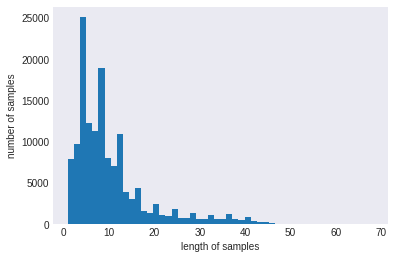

In [104]:
print('리뷰의 최대 길이 :', max(map(len, x_train)))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [117]:
def find_padding_len(set_len):
    cnt = 0
    for l in list(map(len, x_train_raw)):
        if l <= set_len:
            cnt += 1
    return (cnt/len(x_train))*100

for set_len in range(10, 50, 5):
    tmp = find_padding_len(set_len)
    print("길이 {0} : {1}%".format(set_len, tmp))

길이 10 : 64.30364914630063%
길이 15 : 82.205529516795%
길이 20 : 88.46668898560428%
길이 25 : 92.0656176765986%
길이 30 : 94.62462336792768%
길이 35 : 96.68145296283896%
길이 40 : 98.75153442696127%
길이 45 : 99.85353197187814%


In [118]:
padding_len = 35

In [119]:
x_train = pad_sequences(x_train, maxlen = padding_len, truncating='post', padding='post')
x_test = pad_sequences(x_test, maxlen = padding_len, truncating='post', padding='post')

In [120]:
x_train

array([[  44,  441,   16, ...,    0,    0,    0],
       [ 931,  442,   37, ...,    0,    0,    0],
       [ 373, 2426, 2296, ...,    0,    0,    0],
       ...,
       [  35,   54,   48, ...,    0,    0,    0],
       [1023,    1, 2248, ...,    0,    0,    0],
       [ 185,    1, 1801, ...,    0,    0,    0]], dtype=int32)

In [122]:
x_train.shape       # padding 완료

(143376, 35)

### **LSTM 모델로 Sentiment Analysis** 
- 데이터 : 

#### **Import Modules**

In [2]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#### **Modeling**
- [Embedding](https://wikidocs.net/32105)
- One-Hot Encoding + Dense Dimension
- padding_len x cur_dim ---> padding_len x emb_dim

In [4]:
emb_dim = 64
cur_dim = 19000     # vocab size
padding_len = 35

In [5]:
model = Sequential([
    Embedding(cur_dim, emb_dim, input_length=padding_len),      
    Bidirectional(LSTM(128, return_sequences=True)),
    Bidirectional(LSTM(64)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 35, 64)            1216000   
                                                                 
 bidirectional (Bidirectiona  (None, 35, 256)          197632    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              164352    
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                4128      
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 1

In [127]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [128]:
checkpoint_path = 'my_checkpoint.ckpt'
checkpoint = ModelCheckpoint(checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss',
                             verbose=1)

In [129]:
epochs=10
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    callbacks=[checkpoint],
                    epochs=epochs)

Epoch 1/10
4480/4481 [============================>.] - ETA: 0s - loss: 0.3787 - acc: 0.8286
Epoch 00001: val_loss improved from inf to 0.34699, saving model to my_checkpoint.ckpt
4481/4481 [==============================] - 233s 48ms/step - loss: 0.3787 - acc: 0.8286 - val_loss: 0.3470 - val_acc: 0.8488
Epoch 2/10
4480/4481 [============================>.] - ETA: 0s - loss: 0.2936 - acc: 0.8751
Epoch 00002: val_loss improved from 0.34699 to 0.33911, saving model to my_checkpoint.ckpt
4481/4481 [==============================] - 212s 47ms/step - loss: 0.2935 - acc: 0.8751 - val_loss: 0.3391 - val_acc: 0.8518
Epoch 3/10
4480/4481 [============================>.] - ETA: 0s - loss: 0.2461 - acc: 0.8977
Epoch 00003: val_loss did not improve from 0.33911
4481/4481 [==============================] - 212s 47ms/step - loss: 0.2461 - acc: 0.8977 - val_loss: 0.3512 - val_acc: 0.8495
Epoch 4/10
4481/4481 [==============================] - ETA: 0s - loss: 0.2051 - acc: 0.9166
Epoch 00004: val_loss

In [130]:
model.load_weights(checkpoint_path)

In [ ]:
loss, acc = model.evaluate(x_test, y_test)

In [134]:
print("Model Loss : {0}\nModel Accuracy : {1}".format(np.round(loss, 4), np.round(acc, 4)))

Model Loss : 0.3391
Model Accuracy : 0.8518


### **Fitting 결과 시각화**

In [135]:
import matplotlib.pyplot as plt

#### **Loss/ Val_Loss**

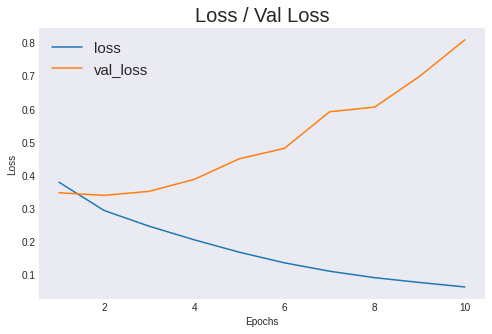

In [136]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, epochs+1), history.history['loss'])
plt.plot(np.arange(1, epochs+1), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

#### **Accuracy/ Val_Accuracy**

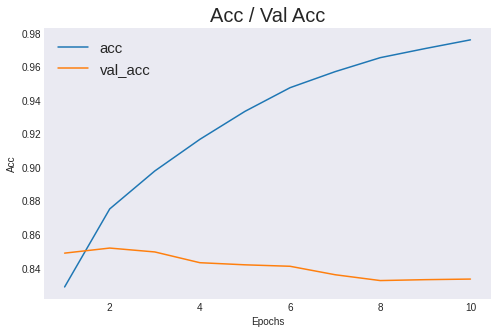

In [137]:
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, epochs+1), history.history['acc'])
plt.plot(np.arange(1, epochs+1), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()

### **Naver 지식인 코로나19 & 감정 관련 게시글 감정분석**

In [139]:
from bs4 import BeautifulSoup
import urllib.request 
import urllib.parse

from tqdm import tqdm_notebook
import time

In [140]:
base_url = "https://search.naver.com/search.naver?where=kin&kin_display=10&qt=&title=0&&answer=0&grade=0&choice=0&sec=0&nso=so%3Ar%2Ca%3Aall%2Cp%3Aall&query={input}&c_id=&c_name=&sm=tab_pge&kin_start={i}&kin_age=0"
contents = []
for i in tqdm_notebook(range(1, 5000+1, 10)):
    search_url = urllib.request.urlopen(base_url.format(input=urllib.parse.quote_plus("코로나 & 감정"), i=i))
    soup = BeautifulSoup(search_url, 'html.parser')
    tmp = soup.find_all(class_="question_group")

    for line in tmp:
        contents.append(line.text)
    time.sleep(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


  0%|          | 0/500 [00:00<?, ?it/s]

In [158]:
contents[:2]
for sen in contents[:2]:
    print(get_sentiment(sen))

[[ 654  420 1450   75   17 1122   15  788 1216   18   10  266 2033  210
   128   48 4582    6  564  210  794 2318   88 1216   12  171    4 9844
     5   48   18  788 1216  804   48]]
0.9743212461471558
[[  822   624 13412    72     7 10078   562   768   116  1569     4  1016
     63   550  7292     2   200  3923    21  1576  1799    78   183    31
    104 10078 12058     2   200  3923    21  1799  2402  2402     6]]
0.22160619497299194


In [141]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
stopwords += ['이', '있', '하', '것', '들', '그', '되', '수', '이', '보', '않', '없', '나', '사람', '주', '아니', '등', '같', '우리', '때', '년', '가', '한', '지', '대하', '오', '말', '일', '그렇', '위하']
stopwords = list(set(stopwords))

In [162]:
positive = 0
neutral = 0
negative = 0

for sen in tqdm(contents):
    tmp_res = get_sentiment(sen)
    if tmp_res == 1:
        positive += 1
    elif tmp_res == 0:
        neutral += 1
    else:
        negative += 1

print()
print("Positive 게시글 : {0}, Neutral 게시글 : {1}, Negative 게시글 : {2}".format(positive, neutral, negative))

100%|██████████| 5000/5000 [06:39<00:00, 12.51it/s]


Positive 게시글 : 1247, Neutral 게시글 : 11, Negative 게시글 : 3742


In [161]:
def get_sentiment(sen):
    sen = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", sen)
    sen = okt.morphs(sen, stem=True)
    sen = [word for word in sen if word not in stopwords]
    encoded = tokenizer.texts_to_sequences([sen])       # label encoding
    padded = pad_sequences(encoded, maxlen=padding_len)       # padding
    # print(padded)
    score = float(model.predict(padded))
    if score > 0.505:
        return 1
    elif 0.495 <= score <= 0.505 :
        return 0
    else:
        return -1

#### **Pie Chart 로 시각화**

In [181]:
!apt -qq -y install fonts-nanum > /dev/null

In [185]:
import matplotlib.font_manager as fm
from matplotlib import rc

fontpath="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
font = fm.FontProperties(fname=fontpath).get_name()

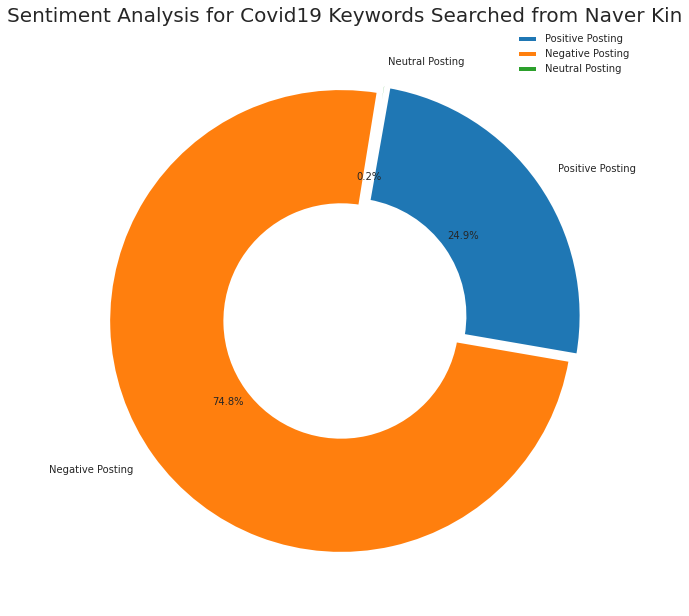

In [195]:
figure = plt.figure(figsize=(10, 11))
wedgeprops={'width': 0.5, 'edgecolor': 'w', 'linewidth': 3}
rc('font', family=font)

plt.pie([positive, negative, neutral], labels=["Positive Posting", "Negative Posting", "Neutral Posting"], \
        autopct='%.1f%%', startangle=80, explode=[0.02 for _ in range(3)], \
        wedgeprops=wedgeprops, counterclock=False)

plt.legend(loc='upper right', shadow=True, fancybox=True, borderpad=0.1)
plt.title("Sentiment Analysis for Covid19 Keywords Searched from Naver Kin", fontsize=20)
plt.tight_layout()

plt.show()